In [109]:
import pandas as pd 
import numpy as np 
import seaborn as sn
import matplotlib.pyplot as plt
from enum import Enum 
import statsmodels.api as sm 

In [110]:
%matplotlib inline 

In [111]:
class Parameters(Enum):
    N = 10_000 
    RandomSeed = 18
    Epsilon = {'loc':0, 'scale':1.0, 'size':10_000}

In [112]:
# Set random seed 
np.random.seed(Parameters.RandomSeed.value)

In [113]:
# Generate data 
beauty = np.random.normal(**Parameters.Epsilon.value)
talent = np.random.normal(**Parameters.Epsilon.value)
score = beauty+talent 
star_threshold = np.percentile(star, 99)
star = np.where(score >= star_threshold, 1, 0)
# star[star >= star_threshold] = 1 
# star[star < star_threshold] = 0 

beauty = beauty.reshape(-1, 1)
talent = talent.reshape(-1, 1)
score = score.reshape(-1, 1)
star = star.reshape(-1, 1)
const = np.array([1]*Parameters.N.value).reshape(-1,1)

data = np.concatenate([const, beauty, talent, score, star], axis=1)
columns = ['const','beauty', 'talent', 'score', 'star']
data = pd.DataFrame(data, columns=columns)

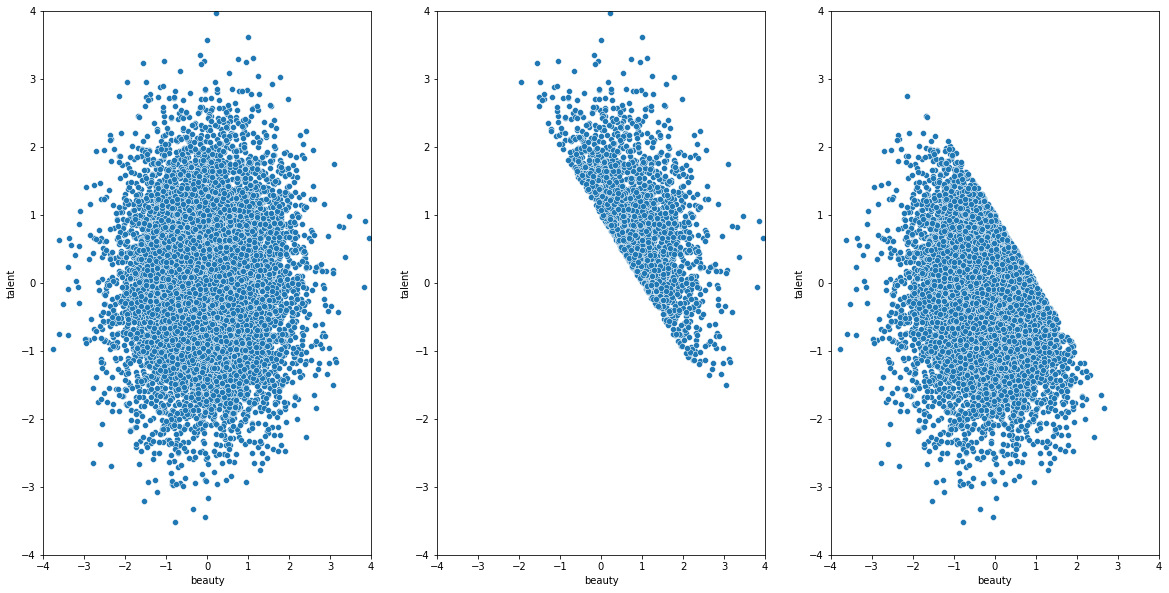

In [114]:
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
sn.scatterplot(x='beauty', y='talent', data=data)
plt.xlim([-4, 4])
plt.ylim([-4,4])

plt.subplot(1,3,2)
star_data = data[data['star']==1]
sn.scatterplot(x='beauty', y='talent', data=star_data)
plt.xlim([-4, 4])
plt.ylim([-4,4])

plt.subplot(1,3,3)
nonstar_data = data[data['star']==0]
sn.scatterplot(x='beauty', y='talent', data=nonstar_data)
plt.xlim([-4, 4])
plt.ylim([-4,4])
plt.show()

# Analyzing star data

In [115]:
X = star_data[['const', 'beauty']]
y = star_data['talent']
model1 = sm.OLS(y, X)
results = model1.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 talent   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     1524.
Date:                Sun, 20 Mar 2022   Prob (F-statistic):          2.23e-259
Time:                        23:02:02   Log-Likelihood:                -2300.6
No. Observations:                2443   AIC:                             4605.
Df Residuals:                    2441   BIC:                             4617.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5032      0.019     78.171      0.0

# Analyzing non-star data

In [116]:
X = nonstar_data[['const', 'beauty']]
y = nonstar_data['talent']
model1 = sm.OLS(y, X)
results = model1.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 talent   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     625.6
Date:                Sun, 20 Mar 2022   Prob (F-statistic):          1.02e-132
Time:                        23:02:03   Log-Likelihood:                -9360.1
No. Observations:                7557   AIC:                         1.872e+04
Df Residuals:                    7555   BIC:                         1.874e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3754      0.010    -36.960      0.0

# Analyzing overall

In [117]:
X = data[['const', 'beauty']]
y = data['talent']
model1 = sm.OLS(y, X)
results = model1.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 talent   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.650
Date:                Sun, 20 Mar 2022   Prob (F-statistic):             0.0311
Time:                        23:02:16   Log-Likelihood:                -14195.
No. Observations:               10000   AIC:                         2.839e+04
Df Residuals:                    9998   BIC:                         2.841e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0071      0.010      0.709      0.4

# Compare with beauty + star

In [118]:
X = data[['const', 'beauty', 'star']]
y = data['talent']
model1 = sm.OLS(y, X)
results = model1.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 talent   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     2879.
Date:                Sun, 20 Mar 2022   Prob (F-statistic):               0.00
Time:                        23:03:36   Log-Likelihood:                -11923.
No. Observations:               10000   AIC:                         2.385e+04
Df Residuals:                    9997   BIC:                         2.387e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3970      0.010    -41.400      0.0